## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.45491 | train_mse: 1.1331  | train_mae: 0.74674 |  0:00:00s


epoch 1  | loss: 0.86417 | train_mse: 0.8472  | train_mae: 0.65981 |  0:00:01s


epoch 2  | loss: 0.56288 | train_mse: 0.575   | train_mae: 0.50924 |  0:00:01s


epoch 3  | loss: 0.42938 | train_mse: 0.35986 | train_mae: 0.45077 |  0:00:01s


epoch 4  | loss: 0.37658 | train_mse: 0.47287 | train_mae: 0.45503 |  0:00:02s


epoch 5  | loss: 0.3613  | train_mse: 0.40593 | train_mae: 0.40763 |  0:00:02s


epoch 6  | loss: 0.38692 | train_mse: 0.3068  | train_mae: 0.38455 |  0:00:03s


epoch 7  | loss: 0.35926 | train_mse: 0.39841 | train_mae: 0.40912 |  0:00:03s


epoch 8  | loss: 0.39811 | train_mse: 0.32176 | train_mae: 0.38795 |  0:00:04s


epoch 9  | loss: 0.38434 | train_mse: 0.25986 | train_mae: 0.35077 |  0:00:04s


epoch 10 | loss: 0.30117 | train_mse: 0.25947 | train_mae: 0.35899 |  0:00:04s


epoch 11 | loss: 0.32434 | train_mse: 0.20035 | train_mae: 0.32212 |  0:00:05s


epoch 12 | loss: 0.26642 | train_mse: 0.20498 | train_mae: 0.32762 |  0:00:06s


epoch 13 | loss: 0.30117 | train_mse: 0.16725 | train_mae: 0.3029  |  0:00:07s


epoch 14 | loss: 0.27319 | train_mse: 0.17595 | train_mae: 0.29739 |  0:00:07s


epoch 15 | loss: 0.20781 | train_mse: 0.16506 | train_mae: 0.28548 |  0:00:08s


epoch 16 | loss: 0.22745 | train_mse: 0.14626 | train_mae: 0.27507 |  0:00:08s


epoch 17 | loss: 0.22641 | train_mse: 0.17109 | train_mae: 0.29373 |  0:00:09s


epoch 18 | loss: 0.25002 | train_mse: 0.16264 | train_mae: 0.29171 |  0:00:09s


epoch 19 | loss: 0.21778 | train_mse: 0.13387 | train_mae: 0.26721 |  0:00:10s


epoch 20 | loss: 0.2168  | train_mse: 0.1335  | train_mae: 0.26379 |  0:00:10s


epoch 21 | loss: 0.20369 | train_mse: 0.13317 | train_mae: 0.26306 |  0:00:11s


epoch 22 | loss: 0.24019 | train_mse: 0.12207 | train_mae: 0.25793 |  0:00:11s


epoch 23 | loss: 0.19535 | train_mse: 0.12464 | train_mae: 0.2522  |  0:00:12s


epoch 24 | loss: 0.20879 | train_mse: 0.12778 | train_mae: 0.25683 |  0:00:12s


epoch 25 | loss: 0.20995 | train_mse: 0.13142 | train_mae: 0.25765 |  0:00:12s


epoch 26 | loss: 0.17751 | train_mse: 0.13942 | train_mae: 0.25761 |  0:00:13s


epoch 27 | loss: 0.17403 | train_mse: 0.1502  | train_mae: 0.26554 |  0:00:13s


epoch 28 | loss: 0.21654 | train_mse: 0.15999 | train_mae: 0.27193 |  0:00:13s


epoch 29 | loss: 0.17755 | train_mse: 0.16416 | train_mae: 0.27506 |  0:00:14s


epoch 30 | loss: 0.16521 | train_mse: 0.13854 | train_mae: 0.24861 |  0:00:14s


epoch 31 | loss: 0.17863 | train_mse: 0.13242 | train_mae: 0.25151 |  0:00:15s


epoch 32 | loss: 0.16504 | train_mse: 0.1188  | train_mae: 0.24176 |  0:00:15s


epoch 33 | loss: 0.17239 | train_mse: 0.12787 | train_mae: 0.25244 |  0:00:16s


epoch 34 | loss: 0.18951 | train_mse: 0.12232 | train_mae: 0.25428 |  0:00:17s


epoch 35 | loss: 0.15715 | train_mse: 0.12588 | train_mae: 0.23679 |  0:00:18s


epoch 36 | loss: 0.16607 | train_mse: 0.12393 | train_mae: 0.24751 |  0:00:19s


epoch 37 | loss: 0.17872 | train_mse: 0.11886 | train_mae: 0.24455 |  0:00:20s


epoch 38 | loss: 0.16194 | train_mse: 0.11617 | train_mae: 0.2368  |  0:00:21s


epoch 39 | loss: 0.16878 | train_mse: 0.15151 | train_mae: 0.27093 |  0:00:22s


epoch 40 | loss: 0.1673  | train_mse: 0.13159 | train_mae: 0.24319 |  0:00:23s


epoch 41 | loss: 0.19818 | train_mse: 0.12473 | train_mae: 0.24479 |  0:00:24s


epoch 42 | loss: 0.20376 | train_mse: 0.12513 | train_mae: 0.24362 |  0:00:25s


epoch 43 | loss: 0.22027 | train_mse: 0.1205  | train_mae: 0.24186 |  0:00:25s


epoch 44 | loss: 0.15819 | train_mse: 0.12821 | train_mae: 0.24511 |  0:00:26s


epoch 45 | loss: 0.17345 | train_mse: 0.12269 | train_mae: 0.23658 |  0:00:27s


epoch 46 | loss: 0.15369 | train_mse: 0.14117 | train_mae: 0.25279 |  0:00:28s


epoch 47 | loss: 0.15119 | train_mse: 0.12283 | train_mae: 0.24147 |  0:00:28s


epoch 48 | loss: 0.15254 | train_mse: 0.12498 | train_mae: 0.24485 |  0:00:29s


epoch 49 | loss: 0.1744  | train_mse: 0.10497 | train_mae: 0.22594 |  0:00:30s


epoch 50 | loss: 0.19498 | train_mse: 0.11439 | train_mae: 0.2361  |  0:00:30s


epoch 51 | loss: 0.17535 | train_mse: 0.14495 | train_mae: 0.25659 |  0:00:31s


epoch 52 | loss: 0.17095 | train_mse: 0.14612 | train_mae: 0.27208 |  0:00:31s


epoch 53 | loss: 0.14389 | train_mse: 0.14331 | train_mae: 0.27329 |  0:00:32s


epoch 54 | loss: 0.16795 | train_mse: 0.1521  | train_mae: 0.27416 |  0:00:33s


epoch 55 | loss: 0.15711 | train_mse: 0.1022  | train_mae: 0.22432 |  0:00:34s


epoch 56 | loss: 0.13518 | train_mse: 0.105   | train_mae: 0.22213 |  0:00:35s


epoch 57 | loss: 0.15892 | train_mse: 0.09129 | train_mae: 0.21634 |  0:00:35s


epoch 58 | loss: 0.15663 | train_mse: 0.09467 | train_mae: 0.2265  |  0:00:36s


epoch 59 | loss: 0.14185 | train_mse: 0.09619 | train_mae: 0.22288 |  0:00:37s


epoch 60 | loss: 0.15451 | train_mse: 0.09677 | train_mae: 0.22167 |  0:00:38s


epoch 61 | loss: 0.14607 | train_mse: 0.11546 | train_mae: 0.24661 |  0:00:39s


epoch 62 | loss: 0.14619 | train_mse: 0.11794 | train_mae: 0.23717 |  0:00:40s


epoch 63 | loss: 0.15924 | train_mse: 0.11189 | train_mae: 0.22633 |  0:00:40s


epoch 64 | loss: 0.15179 | train_mse: 0.09841 | train_mae: 0.22367 |  0:00:41s


epoch 65 | loss: 0.29414 | train_mse: 0.10032 | train_mae: 0.22661 |  0:00:42s


epoch 66 | loss: 0.18178 | train_mse: 0.09935 | train_mae: 0.22388 |  0:00:42s


epoch 67 | loss: 0.21255 | train_mse: 0.09424 | train_mae: 0.21902 |  0:00:43s


epoch 68 | loss: 0.14119 | train_mse: 0.1097  | train_mae: 0.23021 |  0:00:44s


epoch 69 | loss: 0.15836 | train_mse: 0.10031 | train_mae: 0.21778 |  0:00:44s


epoch 70 | loss: 0.19752 | train_mse: 0.12005 | train_mae: 0.23354 |  0:00:45s


epoch 71 | loss: 0.17803 | train_mse: 0.14241 | train_mae: 0.26446 |  0:00:46s


epoch 72 | loss: 0.14097 | train_mse: 0.09564 | train_mae: 0.21489 |  0:00:46s


epoch 73 | loss: 0.15812 | train_mse: 0.09698 | train_mae: 0.21996 |  0:00:47s


epoch 74 | loss: 0.14878 | train_mse: 0.10666 | train_mae: 0.23083 |  0:00:47s


epoch 75 | loss: 0.10882 | train_mse: 0.09633 | train_mae: 0.21508 |  0:00:48s


epoch 76 | loss: 0.18173 | train_mse: 0.12514 | train_mae: 0.2448  |  0:00:49s


epoch 77 | loss: 0.18125 | train_mse: 0.11772 | train_mae: 0.23936 |  0:00:50s


epoch 78 | loss: 0.15067 | train_mse: 0.08553 | train_mae: 0.20705 |  0:00:50s


epoch 79 | loss: 0.17832 | train_mse: 0.11531 | train_mae: 0.2235  |  0:00:51s


epoch 80 | loss: 0.16376 | train_mse: 0.08344 | train_mae: 0.20711 |  0:00:52s


epoch 81 | loss: 0.14065 | train_mse: 0.08112 | train_mae: 0.20617 |  0:00:53s


epoch 82 | loss: 0.13328 | train_mse: 0.08175 | train_mae: 0.20342 |  0:00:53s


epoch 83 | loss: 0.1254  | train_mse: 0.07896 | train_mae: 0.20129 |  0:00:54s


epoch 84 | loss: 0.1236  | train_mse: 0.0827  | train_mae: 0.20602 |  0:00:55s


epoch 85 | loss: 0.12045 | train_mse: 0.08182 | train_mae: 0.19837 |  0:00:55s


epoch 86 | loss: 0.12799 | train_mse: 0.07839 | train_mae: 0.20553 |  0:00:56s


epoch 87 | loss: 0.15228 | train_mse: 0.07492 | train_mae: 0.20192 |  0:00:56s


epoch 88 | loss: 0.11748 | train_mse: 0.08926 | train_mae: 0.21635 |  0:00:57s


epoch 89 | loss: 0.14108 | train_mse: 0.07624 | train_mae: 0.19814 |  0:00:57s


epoch 90 | loss: 0.11108 | train_mse: 0.08859 | train_mae: 0.20787 |  0:00:57s


epoch 91 | loss: 0.11043 | train_mse: 0.07646 | train_mae: 0.19632 |  0:00:58s


epoch 92 | loss: 0.12639 | train_mse: 0.07593 | train_mae: 0.19686 |  0:00:59s


epoch 93 | loss: 0.10586 | train_mse: 0.07025 | train_mae: 0.19108 |  0:00:59s


epoch 94 | loss: 0.12029 | train_mse: 0.07656 | train_mae: 0.19756 |  0:01:00s


epoch 95 | loss: 0.14036 | train_mse: 0.08418 | train_mae: 0.21121 |  0:01:01s


epoch 96 | loss: 0.10914 | train_mse: 0.08145 | train_mae: 0.19657 |  0:01:02s


epoch 97 | loss: 0.16653 | train_mse: 0.0757  | train_mae: 0.19937 |  0:01:03s


epoch 98 | loss: 0.15415 | train_mse: 0.08253 | train_mae: 0.20697 |  0:01:04s


epoch 99 | loss: 0.12556 | train_mse: 0.08391 | train_mae: 0.21613 |  0:01:05s


epoch 100| loss: 0.11321 | train_mse: 0.07733 | train_mae: 0.19743 |  0:01:05s


epoch 101| loss: 0.10982 | train_mse: 0.07695 | train_mae: 0.2005  |  0:01:06s


epoch 102| loss: 0.13564 | train_mse: 0.07832 | train_mae: 0.20561 |  0:01:06s


epoch 103| loss: 0.16226 | train_mse: 0.08361 | train_mae: 0.2025  |  0:01:07s


epoch 104| loss: 0.11933 | train_mse: 0.07505 | train_mae: 0.19704 |  0:01:08s


epoch 105| loss: 0.12563 | train_mse: 0.07021 | train_mae: 0.19483 |  0:01:09s


epoch 106| loss: 0.14297 | train_mse: 0.06391 | train_mae: 0.18668 |  0:01:10s


epoch 107| loss: 0.10777 | train_mse: 0.06406 | train_mae: 0.19059 |  0:01:10s


epoch 108| loss: 0.14278 | train_mse: 0.07732 | train_mae: 0.19309 |  0:01:12s


epoch 109| loss: 0.10886 | train_mse: 0.06765 | train_mae: 0.18719 |  0:01:13s


epoch 110| loss: 0.10797 | train_mse: 0.08915 | train_mae: 0.20573 |  0:01:14s


epoch 111| loss: 0.12455 | train_mse: 0.0655  | train_mae: 0.18374 |  0:01:14s


epoch 112| loss: 0.12768 | train_mse: 0.07889 | train_mae: 0.2053  |  0:01:15s


epoch 113| loss: 0.12759 | train_mse: 0.06815 | train_mae: 0.18897 |  0:01:16s


epoch 114| loss: 0.15092 | train_mse: 0.08851 | train_mae: 0.20896 |  0:01:17s


epoch 115| loss: 0.11678 | train_mse: 0.0704  | train_mae: 0.19448 |  0:01:18s


epoch 116| loss: 0.11249 | train_mse: 0.0622  | train_mae: 0.1832  |  0:01:18s


epoch 117| loss: 0.12259 | train_mse: 0.09247 | train_mae: 0.21537 |  0:01:19s


epoch 118| loss: 0.14244 | train_mse: 0.08058 | train_mae: 0.19249 |  0:01:20s


epoch 119| loss: 0.09974 | train_mse: 0.07002 | train_mae: 0.19138 |  0:01:21s


epoch 120| loss: 0.12002 | train_mse: 0.07677 | train_mae: 0.19331 |  0:01:22s


epoch 121| loss: 0.10858 | train_mse: 0.06284 | train_mae: 0.18513 |  0:01:23s


epoch 122| loss: 0.11374 | train_mse: 0.06664 | train_mae: 0.18997 |  0:01:24s


epoch 123| loss: 0.12506 | train_mse: 0.08959 | train_mae: 0.21522 |  0:01:24s


epoch 124| loss: 0.12338 | train_mse: 0.06681 | train_mae: 0.18492 |  0:01:25s


epoch 125| loss: 0.09793 | train_mse: 0.0895  | train_mae: 0.20943 |  0:01:25s


epoch 126| loss: 0.11201 | train_mse: 0.06899 | train_mae: 0.19126 |  0:01:26s


epoch 127| loss: 0.12678 | train_mse: 0.06835 | train_mae: 0.18121 |  0:01:26s


epoch 128| loss: 0.12366 | train_mse: 0.08952 | train_mae: 0.20526 |  0:01:27s


epoch 129| loss: 0.14786 | train_mse: 0.07845 | train_mae: 0.19859 |  0:01:27s


epoch 130| loss: 0.12759 | train_mse: 0.06877 | train_mae: 0.18965 |  0:01:28s


epoch 131| loss: 0.12256 | train_mse: 0.07423 | train_mae: 0.2017  |  0:01:29s


epoch 132| loss: 0.15485 | train_mse: 0.09006 | train_mae: 0.20381 |  0:01:30s


epoch 133| loss: 0.13349 | train_mse: 0.08363 | train_mae: 0.20316 |  0:01:31s


epoch 134| loss: 0.1299  | train_mse: 0.06586 | train_mae: 0.19025 |  0:01:33s


epoch 135| loss: 0.12338 | train_mse: 0.07092 | train_mae: 0.19904 |  0:01:34s


epoch 136| loss: 0.12017 | train_mse: 0.07976 | train_mae: 0.20494 |  0:01:34s


epoch 137| loss: 0.13796 | train_mse: 0.0763  | train_mae: 0.20438 |  0:01:36s


epoch 138| loss: 0.1172  | train_mse: 0.08635 | train_mae: 0.21649 |  0:01:37s


epoch 139| loss: 0.10313 | train_mse: 0.06551 | train_mae: 0.19024 |  0:01:37s


epoch 140| loss: 0.1322  | train_mse: 0.06396 | train_mae: 0.18665 |  0:01:38s


epoch 141| loss: 0.1098  | train_mse: 0.06652 | train_mae: 0.19365 |  0:01:39s


epoch 142| loss: 0.11292 | train_mse: 0.06971 | train_mae: 0.18844 |  0:01:39s


epoch 143| loss: 0.15681 | train_mse: 0.0657  | train_mae: 0.18555 |  0:01:40s


epoch 144| loss: 0.11015 | train_mse: 0.08353 | train_mae: 0.19751 |  0:01:41s


epoch 145| loss: 0.12209 | train_mse: 0.07595 | train_mae: 0.19821 |  0:01:41s


epoch 146| loss: 0.12124 | train_mse: 0.06934 | train_mae: 0.19415 |  0:01:42s


epoch 147| loss: 0.1238  | train_mse: 0.06538 | train_mae: 0.18662 |  0:01:43s


epoch 148| loss: 0.11567 | train_mse: 0.06626 | train_mae: 0.19233 |  0:01:43s


epoch 149| loss: 0.11142 | train_mse: 0.06443 | train_mae: 0.18536 |  0:01:43s


epoch 150| loss: 0.18062 | train_mse: 0.08169 | train_mae: 0.21147 |  0:01:44s


epoch 151| loss: 0.11424 | train_mse: 0.06461 | train_mae: 0.18555 |  0:01:44s


epoch 152| loss: 0.10129 | train_mse: 0.06214 | train_mae: 0.18525 |  0:01:45s


epoch 153| loss: 0.15785 | train_mse: 0.06751 | train_mae: 0.19513 |  0:01:46s


epoch 154| loss: 0.12487 | train_mse: 0.07384 | train_mae: 0.19683 |  0:01:46s


epoch 155| loss: 0.1371  | train_mse: 0.06109 | train_mae: 0.17815 |  0:01:47s


epoch 156| loss: 0.11124 | train_mse: 0.06268 | train_mae: 0.18377 |  0:01:47s


epoch 157| loss: 0.09623 | train_mse: 0.06429 | train_mae: 0.19021 |  0:01:47s


epoch 158| loss: 0.11336 | train_mse: 0.06831 | train_mae: 0.1916  |  0:01:48s


epoch 159| loss: 0.09204 | train_mse: 0.08245 | train_mae: 0.21151 |  0:01:48s


epoch 160| loss: 0.11025 | train_mse: 0.06886 | train_mae: 0.19517 |  0:01:49s


epoch 161| loss: 0.09338 | train_mse: 0.08381 | train_mae: 0.21572 |  0:01:49s


epoch 162| loss: 0.13522 | train_mse: 0.08806 | train_mae: 0.20231 |  0:01:49s


epoch 163| loss: 0.11617 | train_mse: 0.07441 | train_mae: 0.18857 |  0:01:50s


epoch 164| loss: 0.11354 | train_mse: 0.09198 | train_mae: 0.21236 |  0:01:50s


epoch 165| loss: 0.13242 | train_mse: 0.07624 | train_mae: 0.19934 |  0:01:51s


epoch 166| loss: 0.11649 | train_mse: 0.08691 | train_mae: 0.20505 |  0:01:52s


epoch 167| loss: 0.12186 | train_mse: 0.06355 | train_mae: 0.1782  |  0:01:52s


epoch 168| loss: 0.14726 | train_mse: 0.06993 | train_mae: 0.18648 |  0:01:53s


epoch 169| loss: 0.11233 | train_mse: 0.06573 | train_mae: 0.18308 |  0:01:53s


epoch 170| loss: 0.09913 | train_mse: 0.06817 | train_mae: 0.19295 |  0:01:54s


epoch 171| loss: 0.12112 | train_mse: 0.07154 | train_mae: 0.19212 |  0:01:54s


epoch 172| loss: 0.096   | train_mse: 0.06815 | train_mae: 0.18168 |  0:01:55s


epoch 173| loss: 0.10662 | train_mse: 0.07038 | train_mae: 0.19621 |  0:01:55s


epoch 174| loss: 0.092   | train_mse: 0.06161 | train_mae: 0.17772 |  0:01:56s


epoch 175| loss: 0.09605 | train_mse: 0.08744 | train_mae: 0.21159 |  0:01:56s


epoch 176| loss: 0.11309 | train_mse: 0.07133 | train_mae: 0.1908  |  0:01:57s


epoch 177| loss: 0.10994 | train_mse: 0.07895 | train_mae: 0.18988 |  0:01:57s


epoch 178| loss: 0.11447 | train_mse: 0.06989 | train_mae: 0.19292 |  0:01:57s


epoch 179| loss: 0.13652 | train_mse: 0.06088 | train_mae: 0.18336 |  0:01:58s


epoch 180| loss: 0.09846 | train_mse: 0.06702 | train_mae: 0.18523 |  0:01:58s


epoch 181| loss: 0.12465 | train_mse: 0.06253 | train_mae: 0.17522 |  0:01:58s


epoch 182| loss: 0.11842 | train_mse: 0.07661 | train_mae: 0.19673 |  0:01:59s


epoch 183| loss: 0.10818 | train_mse: 0.06438 | train_mae: 0.17845 |  0:01:59s


epoch 184| loss: 0.12218 | train_mse: 0.06075 | train_mae: 0.17535 |  0:01:59s


epoch 185| loss: 0.10345 | train_mse: 0.08861 | train_mae: 0.21939 |  0:02:00s


epoch 186| loss: 0.14247 | train_mse: 0.07485 | train_mae: 0.18408 |  0:02:00s


epoch 187| loss: 0.10953 | train_mse: 0.08541 | train_mae: 0.19419 |  0:02:01s


epoch 188| loss: 0.12252 | train_mse: 0.05445 | train_mae: 0.16978 |  0:02:01s


epoch 189| loss: 0.09647 | train_mse: 0.05856 | train_mae: 0.17999 |  0:02:02s


epoch 190| loss: 0.10981 | train_mse: 0.07687 | train_mae: 0.19716 |  0:02:03s


epoch 191| loss: 0.1072  | train_mse: 0.07717 | train_mae: 0.18686 |  0:02:04s


epoch 192| loss: 0.09805 | train_mse: 0.08384 | train_mae: 0.19933 |  0:02:04s


epoch 193| loss: 0.0978  | train_mse: 0.06769 | train_mae: 0.18726 |  0:02:05s


epoch 194| loss: 0.10415 | train_mse: 0.16575 | train_mae: 0.2303  |  0:02:05s


epoch 195| loss: 0.11949 | train_mse: 0.10142 | train_mae: 0.21404 |  0:02:06s


epoch 196| loss: 0.1064  | train_mse: 0.07143 | train_mae: 0.19906 |  0:02:06s


epoch 197| loss: 0.10804 | train_mse: 0.08115 | train_mae: 0.20716 |  0:02:07s


epoch 198| loss: 0.12255 | train_mse: 0.07954 | train_mae: 0.19742 |  0:02:07s


epoch 199| loss: 0.09942 | train_mse: 0.07628 | train_mae: 0.17927 |  0:02:08s


epoch 200| loss: 0.11215 | train_mse: 0.06981 | train_mae: 0.18334 |  0:02:08s


epoch 201| loss: 0.11102 | train_mse: 0.0623  | train_mae: 0.18494 |  0:02:08s


epoch 202| loss: 0.13098 | train_mse: 0.06042 | train_mae: 0.17736 |  0:02:09s


epoch 203| loss: 0.10841 | train_mse: 0.06596 | train_mae: 0.18309 |  0:02:10s


epoch 204| loss: 0.1384  | train_mse: 0.06155 | train_mae: 0.172   |  0:02:11s


epoch 205| loss: 0.10272 | train_mse: 0.07358 | train_mae: 0.18844 |  0:02:11s


epoch 206| loss: 0.11371 | train_mse: 0.08855 | train_mae: 0.20325 |  0:02:12s


epoch 207| loss: 0.1281  | train_mse: 0.06756 | train_mae: 0.18331 |  0:02:12s


epoch 208| loss: 0.10104 | train_mse: 0.08731 | train_mae: 0.20297 |  0:02:13s


epoch 209| loss: 0.10099 | train_mse: 0.08375 | train_mae: 0.1879  |  0:02:13s


epoch 210| loss: 0.13799 | train_mse: 0.08259 | train_mae: 0.17761 |  0:02:14s


epoch 211| loss: 0.09916 | train_mse: 0.09589 | train_mae: 0.18927 |  0:02:15s


epoch 212| loss: 0.09699 | train_mse: 0.07712 | train_mae: 0.18781 |  0:02:16s


epoch 213| loss: 0.10117 | train_mse: 0.08083 | train_mae: 0.19465 |  0:02:17s


epoch 214| loss: 0.08916 | train_mse: 0.07256 | train_mae: 0.18264 |  0:02:18s


epoch 215| loss: 0.08777 | train_mse: 0.10041 | train_mae: 0.19532 |  0:02:19s


epoch 216| loss: 0.1317  | train_mse: 0.12237 | train_mae: 0.19464 |  0:02:19s


epoch 217| loss: 0.16734 | train_mse: 0.08707 | train_mae: 0.19035 |  0:02:20s


epoch 218| loss: 0.11123 | train_mse: 0.09802 | train_mae: 0.18895 |  0:02:21s


epoch 219| loss: 0.10758 | train_mse: 0.08252 | train_mae: 0.19206 |  0:02:21s


epoch 220| loss: 0.12486 | train_mse: 0.09366 | train_mae: 0.20419 |  0:02:22s


epoch 221| loss: 0.10264 | train_mse: 0.09554 | train_mae: 0.20072 |  0:02:22s


epoch 222| loss: 0.09702 | train_mse: 0.07869 | train_mae: 0.19953 |  0:02:22s


epoch 223| loss: 0.09949 | train_mse: 0.06849 | train_mae: 0.18354 |  0:02:23s


epoch 224| loss: 0.10263 | train_mse: 0.08686 | train_mae: 0.19629 |  0:02:23s


epoch 225| loss: 0.1464  | train_mse: 0.08214 | train_mae: 0.20809 |  0:02:24s


epoch 226| loss: 0.12306 | train_mse: 0.0686  | train_mae: 0.17456 |  0:02:24s


epoch 227| loss: 0.08589 | train_mse: 0.07058 | train_mae: 0.18505 |  0:02:25s


epoch 228| loss: 0.10633 | train_mse: 0.05705 | train_mae: 0.17307 |  0:02:25s


epoch 229| loss: 0.10308 | train_mse: 0.05786 | train_mae: 0.17439 |  0:02:25s


epoch 230| loss: 0.10473 | train_mse: 0.0561  | train_mae: 0.16597 |  0:02:26s


epoch 231| loss: 0.12078 | train_mse: 0.06331 | train_mae: 0.17975 |  0:02:26s


epoch 232| loss: 0.14991 | train_mse: 0.06095 | train_mae: 0.17335 |  0:02:27s


epoch 233| loss: 0.12347 | train_mse: 0.05886 | train_mae: 0.17352 |  0:02:27s


epoch 234| loss: 0.08103 | train_mse: 0.06676 | train_mae: 0.18217 |  0:02:28s


epoch 235| loss: 0.10063 | train_mse: 0.05981 | train_mae: 0.16833 |  0:02:28s


epoch 236| loss: 0.1026  | train_mse: 0.08012 | train_mae: 0.19998 |  0:02:28s


epoch 237| loss: 0.12739 | train_mse: 0.07535 | train_mae: 0.19588 |  0:02:29s


epoch 238| loss: 0.13095 | train_mse: 0.06718 | train_mae: 0.18864 |  0:02:29s


epoch 239| loss: 0.11898 | train_mse: 0.06808 | train_mae: 0.19428 |  0:02:29s


epoch 240| loss: 0.10199 | train_mse: 0.0611  | train_mae: 0.18172 |  0:02:30s


epoch 241| loss: 0.08562 | train_mse: 0.06015 | train_mae: 0.17524 |  0:02:30s


epoch 242| loss: 0.11326 | train_mse: 0.06473 | train_mae: 0.18669 |  0:02:31s


epoch 243| loss: 0.09113 | train_mse: 0.06087 | train_mae: 0.17877 |  0:02:32s


epoch 244| loss: 0.08571 | train_mse: 0.0466  | train_mae: 0.16294 |  0:02:33s


epoch 245| loss: 0.08144 | train_mse: 0.05594 | train_mae: 0.16766 |  0:02:34s


epoch 246| loss: 0.08541 | train_mse: 0.05491 | train_mae: 0.17329 |  0:02:34s


epoch 247| loss: 0.10729 | train_mse: 0.05396 | train_mae: 0.17148 |  0:02:35s


epoch 248| loss: 0.10281 | train_mse: 0.06703 | train_mae: 0.19522 |  0:02:36s


epoch 249| loss: 0.1053  | train_mse: 0.06685 | train_mae: 0.20069 |  0:02:37s


epoch 250| loss: 0.12701 | train_mse: 0.0674  | train_mae: 0.19336 |  0:02:37s


epoch 251| loss: 0.09796 | train_mse: 0.05348 | train_mae: 0.17628 |  0:02:38s


epoch 252| loss: 0.09401 | train_mse: 0.06664 | train_mae: 0.19033 |  0:02:39s


epoch 253| loss: 0.10097 | train_mse: 0.06935 | train_mae: 0.19028 |  0:02:40s


epoch 254| loss: 0.10535 | train_mse: 0.06753 | train_mae: 0.1864  |  0:02:41s


epoch 255| loss: 0.13618 | train_mse: 0.06072 | train_mae: 0.18272 |  0:02:42s


epoch 256| loss: 0.11512 | train_mse: 0.08803 | train_mae: 0.18015 |  0:02:43s


epoch 257| loss: 0.12833 | train_mse: 0.05383 | train_mae: 0.17008 |  0:02:43s


epoch 258| loss: 0.1199  | train_mse: 0.05271 | train_mae: 0.16867 |  0:02:44s


epoch 259| loss: 0.0986  | train_mse: 0.06355 | train_mae: 0.1719  |  0:02:44s


epoch 260| loss: 0.10296 | train_mse: 0.05967 | train_mae: 0.17022 |  0:02:45s


epoch 261| loss: 0.12958 | train_mse: 0.05487 | train_mae: 0.17014 |  0:02:45s


epoch 262| loss: 0.12557 | train_mse: 0.06596 | train_mae: 0.18726 |  0:02:45s


epoch 263| loss: 0.12294 | train_mse: 0.09842 | train_mae: 0.22072 |  0:02:46s


epoch 264| loss: 0.08621 | train_mse: 0.04674 | train_mae: 0.15841 |  0:02:46s


epoch 265| loss: 0.12188 | train_mse: 0.0472  | train_mae: 0.15818 |  0:02:46s


epoch 266| loss: 0.09496 | train_mse: 0.05618 | train_mae: 0.17279 |  0:02:47s


epoch 267| loss: 0.11218 | train_mse: 0.05504 | train_mae: 0.17063 |  0:02:47s


epoch 268| loss: 0.08837 | train_mse: 0.05165 | train_mae: 0.16325 |  0:02:48s


epoch 269| loss: 0.09321 | train_mse: 0.05613 | train_mae: 0.17304 |  0:02:48s


epoch 270| loss: 0.09149 | train_mse: 0.04927 | train_mae: 0.16091 |  0:02:48s


epoch 271| loss: 0.11643 | train_mse: 0.06397 | train_mae: 0.18289 |  0:02:49s


epoch 272| loss: 0.08856 | train_mse: 0.04747 | train_mae: 0.15818 |  0:02:49s


epoch 273| loss: 0.08587 | train_mse: 0.05229 | train_mae: 0.16718 |  0:02:50s


epoch 274| loss: 0.0731  | train_mse: 0.04949 | train_mae: 0.15985 |  0:02:50s


epoch 275| loss: 0.09244 | train_mse: 0.04997 | train_mae: 0.16706 |  0:02:50s


epoch 276| loss: 0.12416 | train_mse: 0.06261 | train_mae: 0.17788 |  0:02:51s


epoch 277| loss: 0.09983 | train_mse: 0.05455 | train_mae: 0.17277 |  0:02:51s


epoch 278| loss: 0.10028 | train_mse: 0.04533 | train_mae: 0.15574 |  0:02:52s


epoch 279| loss: 0.09671 | train_mse: 0.04475 | train_mae: 0.15879 |  0:02:52s


epoch 280| loss: 0.0962  | train_mse: 0.05111 | train_mae: 0.16624 |  0:02:52s


epoch 281| loss: 0.09739 | train_mse: 0.049   | train_mae: 0.16084 |  0:02:53s


epoch 282| loss: 0.0964  | train_mse: 0.06911 | train_mae: 0.18182 |  0:02:53s


epoch 283| loss: 0.08934 | train_mse: 0.06221 | train_mae: 0.17781 |  0:02:53s


epoch 284| loss: 0.10416 | train_mse: 0.05994 | train_mae: 0.1758  |  0:02:54s


epoch 285| loss: 0.09932 | train_mse: 0.05284 | train_mae: 0.16744 |  0:02:54s


epoch 286| loss: 0.09747 | train_mse: 0.06386 | train_mae: 0.19111 |  0:02:55s


epoch 287| loss: 0.09134 | train_mse: 0.05484 | train_mae: 0.1771  |  0:02:55s


epoch 288| loss: 0.1201  | train_mse: 0.05503 | train_mae: 0.17692 |  0:02:55s


epoch 289| loss: 0.08141 | train_mse: 0.04393 | train_mae: 0.1553  |  0:02:56s


epoch 290| loss: 0.09448 | train_mse: 0.04786 | train_mae: 0.16385 |  0:02:56s


epoch 291| loss: 0.10717 | train_mse: 0.0588  | train_mae: 0.17621 |  0:02:56s


epoch 292| loss: 0.10869 | train_mse: 0.06176 | train_mae: 0.17677 |  0:02:57s


epoch 293| loss: 0.12271 | train_mse: 0.06229 | train_mae: 0.18276 |  0:02:57s


epoch 294| loss: 0.11075 | train_mse: 0.05284 | train_mae: 0.17754 |  0:02:57s


epoch 295| loss: 0.10864 | train_mse: 0.05569 | train_mae: 0.17534 |  0:02:58s


epoch 296| loss: 0.10331 | train_mse: 0.05777 | train_mae: 0.17538 |  0:02:58s


epoch 297| loss: 0.09952 | train_mse: 0.06818 | train_mae: 0.18851 |  0:02:59s


epoch 298| loss: 0.09448 | train_mse: 0.06347 | train_mae: 0.1829  |  0:02:59s


epoch 299| loss: 0.09907 | train_mse: 0.06607 | train_mae: 0.1844  |  0:02:59s


epoch 300| loss: 0.09615 | train_mse: 0.0475  | train_mae: 0.16202 |  0:03:00s


epoch 301| loss: 0.0945  | train_mse: 0.05409 | train_mae: 0.17116 |  0:03:01s


epoch 302| loss: 0.13027 | train_mse: 0.06902 | train_mae: 0.18578 |  0:03:02s


epoch 303| loss: 0.13852 | train_mse: 0.06907 | train_mae: 0.19164 |  0:03:03s


epoch 304| loss: 0.09348 | train_mse: 0.04944 | train_mae: 0.16599 |  0:03:03s


epoch 305| loss: 0.11355 | train_mse: 0.05593 | train_mae: 0.17372 |  0:03:04s


epoch 306| loss: 0.08861 | train_mse: 0.0476  | train_mae: 0.16081 |  0:03:04s


epoch 307| loss: 0.09002 | train_mse: 0.04971 | train_mae: 0.16358 |  0:03:05s


epoch 308| loss: 0.10095 | train_mse: 0.04518 | train_mae: 0.1548  |  0:03:05s


epoch 309| loss: 0.08322 | train_mse: 0.04763 | train_mae: 0.15884 |  0:03:06s


epoch 310| loss: 0.13204 | train_mse: 0.04478 | train_mae: 0.15962 |  0:03:06s


epoch 311| loss: 0.10055 | train_mse: 0.05746 | train_mae: 0.17552 |  0:03:07s


epoch 312| loss: 0.07659 | train_mse: 0.04742 | train_mae: 0.15915 |  0:03:07s


epoch 313| loss: 0.07237 | train_mse: 0.04608 | train_mae: 0.16002 |  0:03:07s


epoch 314| loss: 0.1077  | train_mse: 0.04457 | train_mae: 0.15702 |  0:03:08s


epoch 315| loss: 0.07599 | train_mse: 0.06197 | train_mae: 0.18095 |  0:03:08s


epoch 316| loss: 0.09158 | train_mse: 0.05365 | train_mae: 0.16921 |  0:03:09s


epoch 317| loss: 0.08038 | train_mse: 0.0551  | train_mae: 0.17059 |  0:03:09s


epoch 318| loss: 0.0811  | train_mse: 0.05074 | train_mae: 0.16755 |  0:03:09s


epoch 319| loss: 0.10533 | train_mse: 0.04409 | train_mae: 0.15631 |  0:03:10s


epoch 320| loss: 0.10641 | train_mse: 0.04333 | train_mae: 0.15268 |  0:03:10s


epoch 321| loss: 0.07747 | train_mse: 0.04169 | train_mae: 0.15324 |  0:03:11s


epoch 322| loss: 0.09387 | train_mse: 0.04831 | train_mae: 0.15654 |  0:03:11s


epoch 323| loss: 0.09061 | train_mse: 0.06473 | train_mae: 0.18327 |  0:03:11s


epoch 324| loss: 0.11499 | train_mse: 0.04803 | train_mae: 0.16236 |  0:03:12s


epoch 325| loss: 0.08917 | train_mse: 0.06537 | train_mae: 0.18931 |  0:03:12s


epoch 326| loss: 0.07823 | train_mse: 0.04594 | train_mae: 0.15658 |  0:03:13s


epoch 327| loss: 0.08842 | train_mse: 0.04741 | train_mae: 0.15641 |  0:03:13s


epoch 328| loss: 0.08006 | train_mse: 0.04765 | train_mae: 0.1605  |  0:03:14s


epoch 329| loss: 0.11674 | train_mse: 0.05254 | train_mae: 0.16663 |  0:03:14s


epoch 330| loss: 0.11622 | train_mse: 0.04661 | train_mae: 0.15952 |  0:03:14s


epoch 331| loss: 0.08381 | train_mse: 0.04354 | train_mae: 0.1534  |  0:03:15s


epoch 332| loss: 0.09763 | train_mse: 0.05756 | train_mae: 0.17673 |  0:03:15s


epoch 333| loss: 0.12312 | train_mse: 0.05906 | train_mae: 0.17907 |  0:03:16s


epoch 334| loss: 0.09521 | train_mse: 0.05202 | train_mae: 0.17171 |  0:03:16s


epoch 335| loss: 0.09613 | train_mse: 0.04565 | train_mae: 0.16209 |  0:03:16s


epoch 336| loss: 0.07322 | train_mse: 0.04917 | train_mae: 0.16392 |  0:03:17s


epoch 337| loss: 0.13666 | train_mse: 0.06086 | train_mae: 0.18042 |  0:03:18s


epoch 338| loss: 0.09599 | train_mse: 0.05452 | train_mae: 0.17098 |  0:03:18s


epoch 339| loss: 0.08988 | train_mse: 0.05165 | train_mae: 0.16485 |  0:03:18s


epoch 340| loss: 0.07631 | train_mse: 0.04798 | train_mae: 0.15975 |  0:03:19s


epoch 341| loss: 0.11072 | train_mse: 0.05857 | train_mae: 0.17728 |  0:03:19s


epoch 342| loss: 0.08287 | train_mse: 0.04419 | train_mae: 0.16196 |  0:03:20s


epoch 343| loss: 0.09563 | train_mse: 0.0508  | train_mae: 0.17324 |  0:03:21s


epoch 344| loss: 0.07858 | train_mse: 0.05486 | train_mae: 0.17865 |  0:03:21s


epoch 345| loss: 0.10607 | train_mse: 0.04376 | train_mae: 0.15988 |  0:03:21s


epoch 346| loss: 0.07765 | train_mse: 0.04666 | train_mae: 0.16663 |  0:03:22s


epoch 347| loss: 0.12314 | train_mse: 0.05291 | train_mae: 0.17102 |  0:03:22s


epoch 348| loss: 0.09668 | train_mse: 0.05087 | train_mae: 0.16507 |  0:03:23s


epoch 349| loss: 0.08338 | train_mse: 0.04941 | train_mae: 0.15743 |  0:03:23s


epoch 350| loss: 0.09773 | train_mse: 0.06142 | train_mae: 0.17255 |  0:03:23s


epoch 351| loss: 0.10426 | train_mse: 0.05349 | train_mae: 0.16594 |  0:03:24s


epoch 352| loss: 0.09846 | train_mse: 0.04948 | train_mae: 0.1637  |  0:03:24s


epoch 353| loss: 0.13193 | train_mse: 0.0424  | train_mae: 0.1549  |  0:03:24s


epoch 354| loss: 0.12582 | train_mse: 0.05891 | train_mae: 0.17296 |  0:03:25s


epoch 355| loss: 0.08301 | train_mse: 0.04817 | train_mae: 0.15685 |  0:03:25s


epoch 356| loss: 0.08328 | train_mse: 0.04677 | train_mae: 0.15846 |  0:03:26s


epoch 357| loss: 0.06606 | train_mse: 0.04101 | train_mae: 0.14645 |  0:03:26s


epoch 358| loss: 0.06636 | train_mse: 0.04756 | train_mae: 0.16036 |  0:03:26s


epoch 359| loss: 0.06494 | train_mse: 0.03894 | train_mae: 0.14654 |  0:03:27s


epoch 360| loss: 0.07278 | train_mse: 0.05158 | train_mae: 0.16828 |  0:03:27s


epoch 361| loss: 0.09063 | train_mse: 0.04056 | train_mae: 0.15046 |  0:03:27s


epoch 362| loss: 0.09197 | train_mse: 0.04271 | train_mae: 0.1555  |  0:03:28s


epoch 363| loss: 0.08206 | train_mse: 0.04067 | train_mae: 0.15183 |  0:03:28s


epoch 364| loss: 0.09022 | train_mse: 0.0491  | train_mae: 0.16714 |  0:03:28s


epoch 365| loss: 0.09356 | train_mse: 0.05971 | train_mae: 0.16293 |  0:03:29s


epoch 366| loss: 0.06493 | train_mse: 0.05184 | train_mae: 0.17007 |  0:03:29s


epoch 367| loss: 0.07088 | train_mse: 0.03735 | train_mae: 0.14693 |  0:03:30s


epoch 368| loss: 0.0825  | train_mse: 0.03943 | train_mae: 0.14908 |  0:03:30s


epoch 369| loss: 0.08287 | train_mse: 0.04039 | train_mae: 0.14864 |  0:03:30s


epoch 370| loss: 0.09881 | train_mse: 0.04272 | train_mae: 0.15507 |  0:03:31s


epoch 371| loss: 0.09906 | train_mse: 0.0492  | train_mae: 0.16157 |  0:03:31s


epoch 372| loss: 0.0799  | train_mse: 0.05159 | train_mae: 0.16675 |  0:03:31s


epoch 373| loss: 0.09027 | train_mse: 0.04117 | train_mae: 0.15214 |  0:03:32s


epoch 374| loss: 0.10852 | train_mse: 0.04547 | train_mae: 0.15934 |  0:03:32s


epoch 375| loss: 0.08156 | train_mse: 0.04708 | train_mae: 0.15943 |  0:03:33s


epoch 376| loss: 0.10678 | train_mse: 0.04658 | train_mae: 0.16583 |  0:03:33s


epoch 377| loss: 0.09466 | train_mse: 0.04966 | train_mae: 0.16709 |  0:03:33s


epoch 378| loss: 0.09472 | train_mse: 0.05104 | train_mae: 0.16442 |  0:03:34s


epoch 379| loss: 0.081   | train_mse: 0.04388 | train_mae: 0.15342 |  0:03:34s


epoch 380| loss: 0.08238 | train_mse: 0.06206 | train_mae: 0.17584 |  0:03:35s


epoch 381| loss: 0.08746 | train_mse: 0.03963 | train_mae: 0.1496  |  0:03:35s


epoch 382| loss: 0.0722  | train_mse: 0.0518  | train_mae: 0.17134 |  0:03:35s


epoch 383| loss: 0.09126 | train_mse: 0.05942 | train_mae: 0.18199 |  0:03:36s


epoch 384| loss: 0.08761 | train_mse: 0.0459  | train_mae: 0.16193 |  0:03:36s


epoch 385| loss: 0.0892  | train_mse: 0.04405 | train_mae: 0.15676 |  0:03:37s


epoch 386| loss: 0.07114 | train_mse: 0.06882 | train_mae: 0.18692 |  0:03:37s


epoch 387| loss: 0.07402 | train_mse: 0.04427 | train_mae: 0.15424 |  0:03:37s


epoch 388| loss: 0.08034 | train_mse: 0.05465 | train_mae: 0.16359 |  0:03:38s


epoch 389| loss: 0.06786 | train_mse: 0.0441  | train_mae: 0.16282 |  0:03:38s


epoch 390| loss: 0.06613 | train_mse: 0.04518 | train_mae: 0.15744 |  0:03:39s


epoch 391| loss: 0.09564 | train_mse: 0.06001 | train_mae: 0.17445 |  0:03:39s


epoch 392| loss: 0.09029 | train_mse: 0.05571 | train_mae: 0.16828 |  0:03:39s


epoch 393| loss: 0.10883 | train_mse: 0.04558 | train_mae: 0.15672 |  0:03:40s


epoch 394| loss: 0.10535 | train_mse: 0.06239 | train_mae: 0.19146 |  0:03:40s


epoch 395| loss: 0.09189 | train_mse: 0.05859 | train_mae: 0.16887 |  0:03:40s


epoch 396| loss: 0.12544 | train_mse: 0.07942 | train_mae: 0.20297 |  0:03:41s


epoch 397| loss: 0.10613 | train_mse: 0.06425 | train_mae: 0.18743 |  0:03:41s


epoch 398| loss: 0.0655  | train_mse: 0.05347 | train_mae: 0.17129 |  0:03:42s


epoch 399| loss: 0.08144 | train_mse: 0.05451 | train_mae: 0.17114 |  0:03:42s


epoch 400| loss: 0.08515 | train_mse: 0.04974 | train_mae: 0.16106 |  0:03:42s


epoch 401| loss: 0.06546 | train_mse: 0.04825 | train_mae: 0.16306 |  0:03:43s


epoch 402| loss: 0.09389 | train_mse: 0.04767 | train_mae: 0.16323 |  0:03:43s


epoch 403| loss: 0.09261 | train_mse: 0.04011 | train_mae: 0.14984 |  0:03:44s


epoch 404| loss: 0.07812 | train_mse: 0.04728 | train_mae: 0.16052 |  0:03:44s


epoch 405| loss: 0.09983 | train_mse: 0.05171 | train_mae: 0.16655 |  0:03:45s


epoch 406| loss: 0.09429 | train_mse: 0.06052 | train_mae: 0.18169 |  0:03:45s


epoch 407| loss: 0.08391 | train_mse: 0.05722 | train_mae: 0.17368 |  0:03:45s

Early stopping occurred at epoch 407 with best_epoch = 357 and best_train_mae = 0.14645
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.21751064361054928


ABC Pre-generator MAE 1.3119225668138348


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

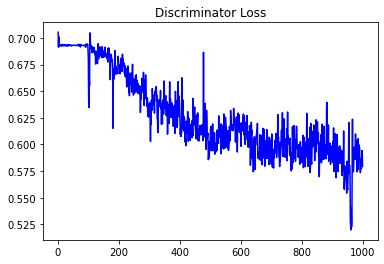

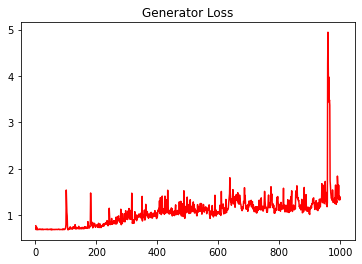

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3231605352954391


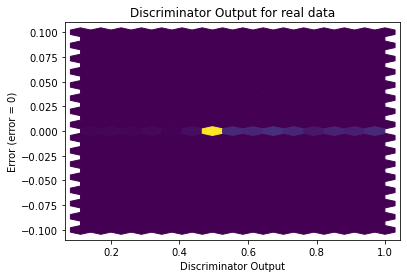

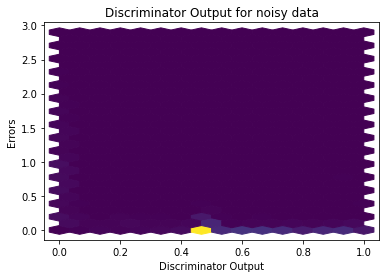

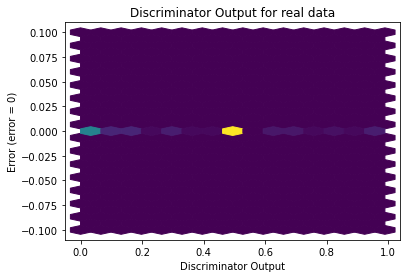

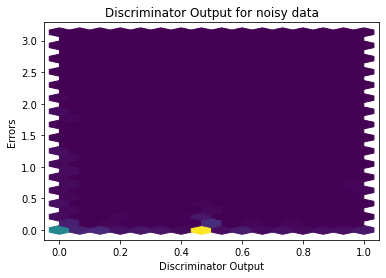

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

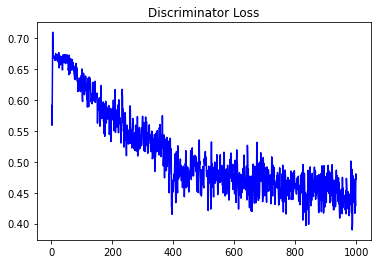

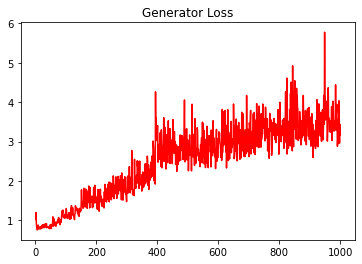

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.25279381928454137


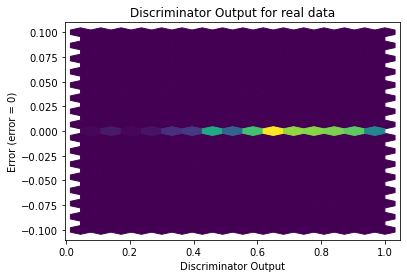

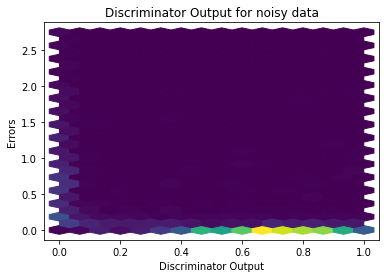

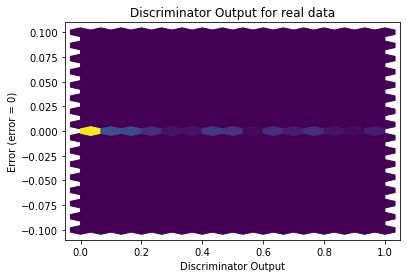

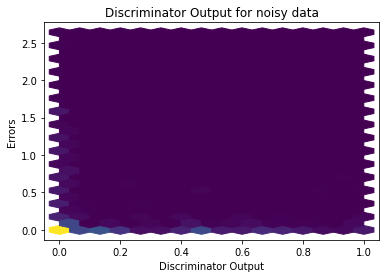

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


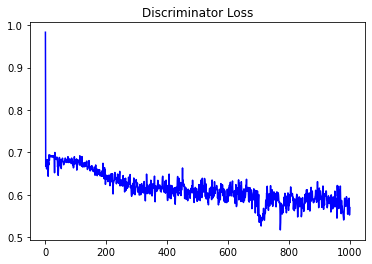

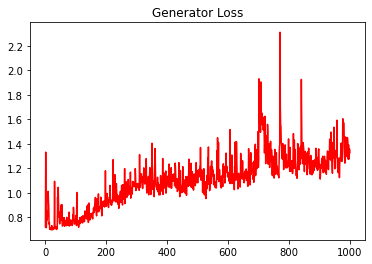

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.28531412736285594


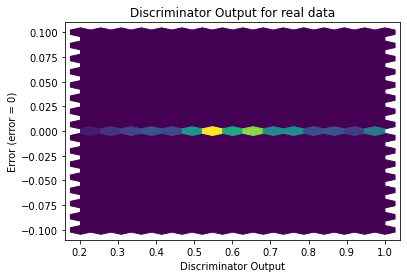

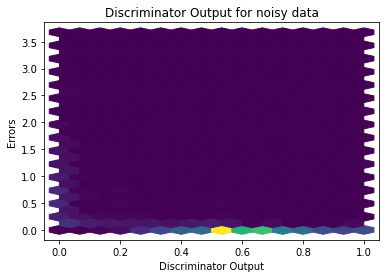

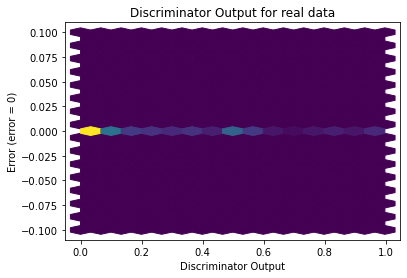

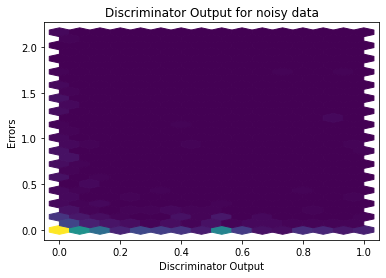

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


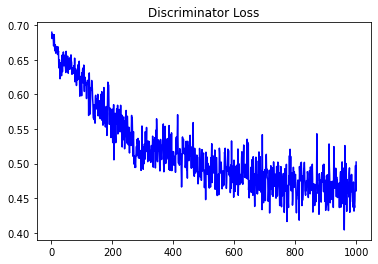

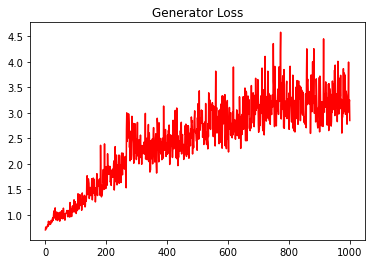

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.23820910433836864


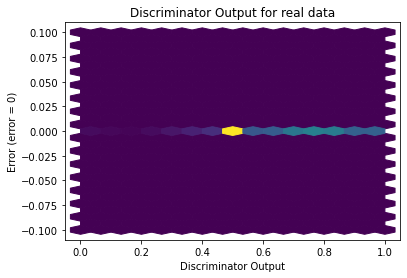

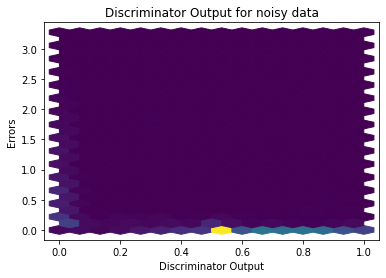

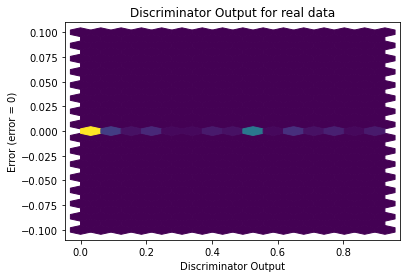

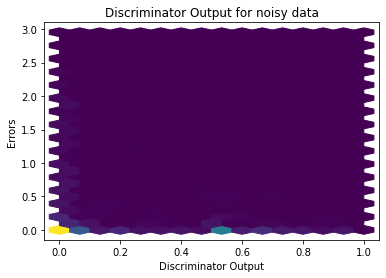

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9738]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9694]], requires_grad=True)
